기출동형 3회

데이터: 객실 사용 여부 관련 데이터

(1) 데이터를 탐색하고 탐색 결과를 제시하시오.

(2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

(3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오.

(4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

(5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

(6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

(7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

(8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

In [3]:
# (1)데이터를 탐색하고 탐색결과를 제시하시오
import pandas as pd
import numpy as np
hotel = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv')
print(hotel.isnull().sum())
print(hotel.info())

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest

In [4]:
hotel.deposit_type.describe()

count          20000
unique             3
top       No Deposit
freq           19138
Name: deposit_type, dtype: object

In [5]:
hotel.groupby(hotel['deposit_type']).mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

①결측치 존재 여부
-> 데이터 탐색 결과, hotel_bookings에는 결측치가 있는 변수는 3개이며, 결측치의 개수는 총 1,426개이다.

결측치가 존재하는 변수들은 비율과 분포에 따라 각각 다른 결측치 대체 방식을 사용할 수 있을 것으로 보인다.

②데이터 타입 설명
종속변수는 int형, 독립변수는 object와 int, float형태로 구성되어 있다.
object타입은 인코딩을 통하여 변환해줄 필요가 있어 보인다.

③ 종속변수 특징
oject형 데이터로 구성된 deposit_type 변수는 20,000개 관측치 중 19, 171개의 관측치가 'No Deposit'에 해당한다.

또한 deposit_type별 adr 평균이 다르게 나타났는데, No Deposit의 평균 adr은 약 101, Non Refund의 평균 adr은 약 90, Refundable의 평균 adr은 약 69이다.

In [6]:
# (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

hotel.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [9]:
# 결측치 비율 확인
print('lead time 결측치 비율 %'.format(round(5/len(hotel)*100, 2)))
print('is repeated guest 결측치 비율: %'.format(round(360/len(hotel)*100, 2)))
print('adr 결측치 비율: %'.format(round(1051/len(hotel)*100, 2)))

lead time 결측치 비율 %
is repeated guest 결측치 비율: %
adr 결측치 비율: %


In [18]:
hotel_nonull=hotel
## lead time 변수의 결측치는 1%가 되지 않음 -> 제거한다
hotel_nonull.dropna(subset=['lead_time'], axis =0, inplace =True)

## is_repeated_guest 변수는 binary이기 때문에 최빈값으로 대체한다
hotel_nonull['is_repeated_guest'] = hotel_nonull['is_repeated_guest'].fillna (0)

##adr 변수는 연속형 변수이기 때문에 평균대치법을 사용한다.
##다만, 보증금 유형에 따라 adr이 다르기 때문에
##adr그룹별 평균을 이용해 결측값을 대체한다.
fill_mean_func = lambda g: g.fillna(g.mean())
hotel_nonull=hotel_nonull.groupby('deposit_type').apply(fill_mean_func)

hotel_nonull.index =hotel_nonull.index.droplevel (0)
hotel_nonull.sort_index(inplace=True)

hotel_nonull.isna().sum()

is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

(3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오.

IQR 방식으로 lead_time 변수의 이상치를 보정해주어 극단적인 값을 제거함으로써 모델에 특정 값이 영향을 주는 경우를 방지한다. 또는 is_repeated_guest 변수에서 [1]에 해당하는 데이터를 더 수집해 해당 변수의 불균형을 해소한다.

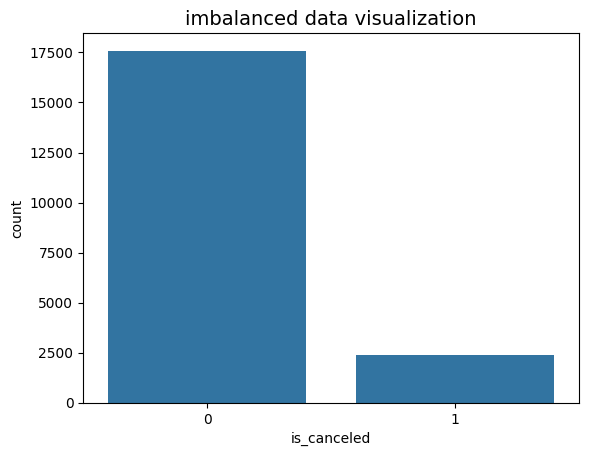

0 비율: %
1 비율: %


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# font_path="C:/Windows/Fonts/Arial.TTF"
# font = font_manager.FontProperties(fname =font_path).get_name()
# rc('font', family =font)
sns.countplot(x='is_canceled', data =hotel_nonull)
plt.title('imbalanced data visualization', fontsize =14)
plt.show()
ratio0 = round(len(hotel_nonull[hotel_nonull['is_canceled'] ==0])/len (hotel_nonull)*100, 2)
ratio1 = round(len(hotel_nonull[hotel_nonull['is_canceled']==1])/len (hotel_nonull)*100, 2)
print('0 비율: %'.format(ratio0))
print('1 비율: %'.format(ratio1))


s_canceled 변수는 0과 1로 구성된 binary 형태의 데이터이다. 0인 데이터와 1인 데이터가 각각 88:12 의 비율이므로, 0인 데이터가 전체 데이터의 90% 가까이 차지한다. 0인 관측값 수와 1인 관측값 수가 균등하게 분포하지 않기 때문에 해당 데이터는 불균형한 데이터(Imbalanced Data)이다.

(5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

오버 샘플링 기법은 비중이 데이터를 추가로 생성해 수를 늘려 데이터 불균형을 극복하는 방식이다.

소수 레이블을 가진 데이터세트를 다수 레이블을 가진 데이터세트의 수만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다. 언더 샘플링은 데이터 손실의 문제로 인해 예측성능이 저하되는 단점이 있으므로, 일반적으로는 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

①Random Oversampling

㉠ 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.

㉡ 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.

㉢ Random Oversampling은 소수 클래스에 과적함이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

② SMOTE

㉠ SMOTE는 적은 데이터세트에 있는 개별 데이터들의 K-최근접 이웃을 찾아 해당 데이터와 k 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.

㉡ SMOTE는 Resampling 방식보다 처리 속도가 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있다는 장점이 있다.

(6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

오버 샘플링 방식으로 Random Oversampling과 SMOTE를 선택한다. 그 이유는 Random Oversampling은 간단한 방식으로 데이터 불균형 문제를 해결할 수 있기 때문이다. SMOTE는 데이터를 생성할 때 과적합 문제를 방지할 수 있다는 점에서 선택하였다.

In [27]:
#먼저 hotel_null 데이터의 object 형태 변수를 one_hot_encoding함
hotel_nonull=pd.get_dummies (hotel_nonull)
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time
#원본데이터 (hotel_nonull)
X = hotel_nonull[hotel_nonull.columns.difference (['is_canceled'])]
y = hotel_nonull['is_canceled']
start = time.time() #시작 시간 저장
# Random Oversampling
ros = RandomOverSampler(random_state =42)
X_ro, y_ro = ros.fit_resample(X, y)
print("time", time.time() - start) #현재시각 - 시작시간 = 실행 시간

time 0.02041792869567871


In [29]:
start = time.time() #시작 시간 저장
# SMOTE
sm = SMOTE(random_state =42)
X_sm, y_sm = ros.fit_resample(X, y)
print("time", time.time()-start) # 현재시각 - 시작시간 = 실행 시간

time 0.03481626510620117


In [33]:
# (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

start = time.time() # 시작 시간 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, stratify =y, random_state =100)
clf = RandomForestClassifier (n_estimators =100, min_samples_split =10)
clf.fit(X_train, y_train)
print('train 정확도 :', clf.score(X_train,y_train), 'Wn')
pred=clf.predict(X_test)
print(classification_report(y_test, pred))
print("time", time.time() - start) #현재시각 - 시작시간 = 실행 시간

train 정확도 : 0.929982495623906 Wn
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      3519
           1       0.92      0.33      0.48       480

    accuracy                           0.92      3999
   macro avg       0.92      0.66      0.72      3999
weighted avg       0.92      0.92      0.90      3999

time 3.8519186973571777


In [35]:
start = time.time() #시작 시간 저장
X_ro_train, X_ro_test, y_ro_train, y_ro_test = train_test_split(X_ro, y_ro, test_size =0.2, stratify =y_ro, random_state =100)
clf_ro = RandomForestClassifier (n_estimators =100, min_samples_split=10, random_state =100)
clf_ro.fit(X_ro_train, y_ro_train)
print('train 정확도 :', clf_ro.score(X_ro_train, y_ro_train), 'Wn')
pred_ro=clf_ro.predict(X_ro_test)
print(classification_report(y_ro_test, pred_ro))
print("time", time.time()-start) #현재시각 - 시작시간 = 실행 시간

train 정확도 : 0.9839087809036658 Wn
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      3519
           1       0.93      0.98      0.95      3519

    accuracy                           0.95      7038
   macro avg       0.95      0.95      0.95      7038
weighted avg       0.95      0.95      0.95      7038

time 8.871901035308838


In [34]:
start = time.time() # 시작 시간 저장
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size =0.2, stratify =y_sm, random_state =100)
clf_sm = RandomForestClassifier(n_estimators =100, min_samples_split=10, random_state =100)
clf_sm.fit(X_sm_train, y_sm_train)
print('train 정확도 :', clf_sm.score (X_sm_train, y_sm_train), '\n')
pred_sm=clf_sm.predict(X_sm_test)
print (classification_report(y_sm_test, pred_sm))
print("time", time.time() - start) #현재시각 - 시작시간 = 실행 시간

train 정확도 : 0.9839087809036658 

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      3519
           1       0.93      0.98      0.95      3519

    accuracy                           0.95      7038
   macro avg       0.95      0.95      0.95      7038
weighted avg       0.95      0.95      0.95      7038

time 8.630611658096313


In [37]:
raw = 0 +1.7477023601531982
ro = 0.03391218185424805+3.019350051879883
sm = 0.0389096736907959+3.2345712184906006
print("원본 데이터세트의 모델링 수행속도 :",'Wt', raw)
print("RO 데이터세트의 모델링 수행속도 :", 'Wt', ro)
print("SMOTE 데이터세트의 모델링 수행속도 :", 'Wt', sm)

원본 데이터세트의 모델링 수행속도 : Wt 1.7477023601531982
RO 데이터세트의 모델링 수행속도 : Wt 3.053262233734131
SMOTE 데이터세트의 모델링 수행속도 : Wt 3.2734808921813965


정확도 측면에서는 SMOTE를 속도 측면에서는 Random Oversampling를 선정한다. 정확도 측면에
서 SMOTE가 우수하다. train score와 test데이터세트의 성능이 세 가지 데이터세트 가운데 가장 우
수하기 때문이다. 속도 측면에서는 원본 데이터세트의 모델링 수행속도가 가장 빠르지만, 이는 원본
데이터가 오버 샘플링 데이터들에 비해 사이즈가 작기 때문이다. 이 점을 감안한다면 Random
Oversampling 방식의 모델링 수행속도가 SMOTE보다 빠르기 때문에, Random Oversamping 방식
이 속도 측면에서 우수하다.

(8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

원본 데이터로 랜덤포레스트 분류 예측을 수행했을 때, train score는 95%의 정확도를 가진다. 오버
샘플링 데이터로 동일한 분류 알고리즘을 수행하면, train score는 98%의 정확도를 가진다. 학습 단계에서는 두 방식 모두 높은 정확도를 보여준다.

하지만, test 데이터로 모델의 최종 성능을 비교해보면 오버 샘플링이 분석 정확도에 긍정적인 영향을 주었다는 것을 알 수 있다. 특히 오버 샘플링은 데이터의 불균형으로 인한 과적합을 방지하고, 예측모델의 일반화를 가능하게 했다는 점에서 영향을 주었다.

원본데이터의 test 데이터로 측정한 모델 성능은 Macro Average가 72%, Weigted Average가 90%이다. 이는 train score보다 낮은 수치이므로 데이터 학습 시 불균형 문제로 인해 과적합이 발생했다는 것을 알 수 있다. 이처럼 불균형한 데이터로 학습한 예측모델은 일반화에 어려움이 있다.

오버 샘플링 데이터의 test 데이터로 측정한 모델의 성능은 Macro Avage가 95%, Weighted Average가 95%이다. 이는 train score와 비슷한 수치이므로 데이터 학습 시 과적합이 발생하지 않았
다는 것을 알 수 있다.

데이터의 불균형 문제를 전처리 과정에서 극복했기 때문이다. 따라서 오버 샘플링 처리를 한 예측모델은 일반화가 가능하다고 판단되므로 실제 분석환경에서 사용할 수 있다.